In [1]:
# ライブラリのインポート
import pandas as pd


In [2]:
# CSVデータの読み込み
train = pd.read_csv('train.csv',index_col='id')
test = pd.read_csv('test.csv',index_col='id')
#submit = pd.read_csv('submit_sample.csv',header=None,names=['id','y'],index_col='id')

#確認
print(train.shape)
print(test.shape)
#print(submit.shape)
#print(submit.head())

(27128, 17)
(18083, 16)


In [3]:
#データ情報の確認
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27128 entries, 1 to 27128
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        27128 non-null  int64 
 1   job        27128 non-null  object
 2   marital    27128 non-null  object
 3   education  27128 non-null  object
 4   default    27128 non-null  object
 5   balance    27128 non-null  int64 
 6   housing    27128 non-null  object
 7   loan       27128 non-null  object
 8   contact    27128 non-null  object
 9   day        27128 non-null  int64 
 10  month      27128 non-null  object
 11  duration   27128 non-null  int64 
 12  campaign   27128 non-null  int64 
 13  pdays      27128 non-null  int64 
 14  previous   27128 non-null  int64 
 15  poutcome   27128 non-null  object
 16  y          27128 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 3.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18083 entries, 1 to 18083
Data columns (total

In [4]:
# 基本統計量の表示
print(train.describe())
print(train.describe(include="O"))

print(test.describe())
print(test.describe(include="O"))

                age        balance           day      duration      campaign  \
count  27128.000000   27128.000000  27128.000000  27128.000000  27128.000000   
mean      40.951010    1355.800870     15.806215    260.711295      2.751769   
std       10.608542    3003.305272      8.337904    260.091727      3.126594   
min       18.000000   -6847.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    104.000000      1.000000   
50%       39.000000     449.000000     16.000000    182.000000      2.000000   
75%       48.000000    1428.000000     21.000000    323.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous             y  
count  27128.000000  27128.000000  27128.000000  
mean      40.528052      0.579733      0.117001  
std      100.382462      2.503653      0.321427  
min       -1.000000      0.000000      0.000000  
25%       -1.000000      0.00

In [14]:
# 質的データの確認
print(train['job'].value_counts())
print(train['marital'].value_counts())
print(train['education'].value_counts())
print(train['default'].value_counts())
print(train['housing'].value_counts())
print(train['loan'].value_counts())
print(train['contact'].value_counts())
print(train['month'].value_counts())
print(train['poutcome'].value_counts())

blue-collar      5886
management       5620
technician       4491
admin.           3085
services         2506
retired          1391
self-employed     945
entrepreneur      914
unemployed        790
housemaid         765
student           557
unknown           178
Name: job, dtype: int64
married     16411
single       7662
divorced     3055
Name: marital, dtype: int64
secondary    13882
tertiary      7959
primary       4150
unknown       1137
Name: education, dtype: int64
no     26644
yes      484
Name: default, dtype: int64
yes    15125
no     12003
Name: housing, dtype: int64
no     22788
yes     4340
Name: loan, dtype: int64
cellular     17580
unknown       7861
telephone     1687
Name: contact, dtype: int64
may    8317
jul    4136
aug    3718
jun    3204
nov    2342
apr    1755
feb    1586
jan     846
oct     439
sep     356
mar     299
dec     130
Name: month, dtype: int64
unknown    22150
failure     2969
other       1123
success      886
Name: poutcome, dtype: int64


In [6]:
print(train['y'].value_counts())


0    23954
1     3174
Name: y, dtype: int64


### クロス集計でデータチェック

In [3]:
# 前回キャンペーン成果と定額預金申し込み有無
cross = pd.crosstab(train['poutcome'], train['y'], margins=True)
rate = cross[1] / cross['All']
cross['cvr'] = rate
display(cross)


y,0,1,All,cvr
poutcome,,,,
failure,2578,391,2969,0.131694
other,950,173,1123,0.154052
success,312,574,886,0.647856
unknown,20114,2036,22150,0.091919
All,23954,3174,27128,0.117001


In [9]:
cross = pd.crosstab(train['job'], train['y'], margins=True)
rate = cross[1] / cross['All']
cross['cvr'] = rate
display(cross)


y,0,1,All,cvr
job,,,,
admin.,2700,385,3085,0.124797
blue-collar,5456,430,5886,0.073055
entrepreneur,834,80,914,0.087527
housemaid,697,68,765,0.088889
management,4853,767,5620,0.136477
retired,1080,311,1391,0.223580
self-employed,828,117,945,0.123810
services,2282,224,2506,0.089385
student,391,166,557,0.298025


In [10]:
cross = pd.crosstab(train['marital'], train['y'], margins=True)
rate = cross[1] / cross['All']
cross['cvr'] = rate
display(cross)


y,0,1,All,cvr
marital,,,,
divorced,2691,364,3055,0.119149
married,14744,1667,16411,0.101578
single,6519,1143,7662,0.149178
All,23954,3174,27128,0.117001


In [11]:
cross = pd.crosstab(train['education'], train['y'], margins=True)
rate = cross[1] / cross['All']
cross['cvr'] = rate
display(cross)


y,0,1,All,cvr
education,,,,
primary,3798,352,4150,0.084819
secondary,12382,1500,13882,0.108054
tertiary,6790,1169,7959,0.146878
unknown,984,153,1137,0.134565
All,23954,3174,27128,0.117001


In [12]:
cross = pd.crosstab(train['housing'], train['y'], margins=True)
rate = cross[1] / cross['All']
cross['cvr'] = rate
display(cross)


y,0,1,All,cvr
housing,,,,
no,9991,2012,12003,0.167625
yes,13963,1162,15125,0.076826
All,23954,3174,27128,0.117001


In [13]:
cross = pd.crosstab(train['month'], train['y'], margins=True)
rate = cross[1] / cross['All']
cross['cvr'] = rate
display(cross)


y,0,1,All,cvr
month,,,,
apr,1418,337,1755,0.192023
aug,3293,425,3718,0.114309
dec,66,64,130,0.492308
feb,1328,258,1586,0.162673
jan,762,84,846,0.099291
jul,3760,376,4136,0.090909
jun,2880,324,3204,0.101124
mar,147,152,299,0.508361
may,7751,566,8317,0.068053


In [14]:
loan_yes = train[(train['housing'] == 'yes') &  (train['loan'] == 'yes')]
cross_yes = pd.crosstab(loan_yes['loan'], loan_yes['y'], margins=True)
loan_no = train[(train['housing'] == 'no') &  (train['loan'] == 'no')]
cross_no = pd.crosstab(loan_no['loan'], loan_no['y'], margins=True)
rate = cross_yes[1] / cross_yes['All']
cross_yes['cvr'] = rate
rate = cross_no[1] / cross_no['All']
cross_no['cvr'] = rate
display(cross_yes)
display(cross_no)


y,0,1,All,cvr
loan,,,,
yes,2462,164,2626,0.062452
All,2462,164,2626,0.062452


y,0,1,All,cvr
loan,,,,
no,8411,1878,10289,0.182525
All,8411,1878,10289,0.182525


,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.095343,-0.008518,-0.005309,-0.001340,-0.025272,0.002946,0.020892
balance,0.095343,1.000000,0.002067,0.019923,-0.016295,0.003613,0.012483,0.045826
day,-0.008518,0.002067,1.000000,-0.032453,0.164880,-0.096889,-0.050009,-0.031058
duration,-0.005309,0.019923,-0.032453,1.000000,-0.087771,0.002030,0.002489,0.401390
campaign,-0.001340,-0.016295,0.164880,-0.087771,1.000000,-0.086220,-0.031557,-0.076118
pdays,-0.025272,0.003613,-0.096889,0.002030,-0.086220,1.000000,0.421606,0.100930
previous,0.002946,0.012483,-0.050009,0.002489,-0.031557,0.421606,1.000000,0.083825
y,0.020892,0.045826,-0.031058,0.401390,-0.076118,0.100930,0.083825,1.000000


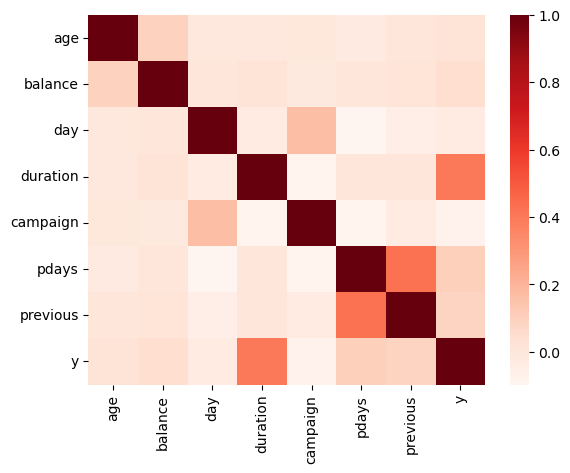

In [8]:
# 量的データの相関係数
corr_matrix = train.corr()
display(corr_matrix)

# ヒートマップを作成する
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr_matrix,cmap="Reds")

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


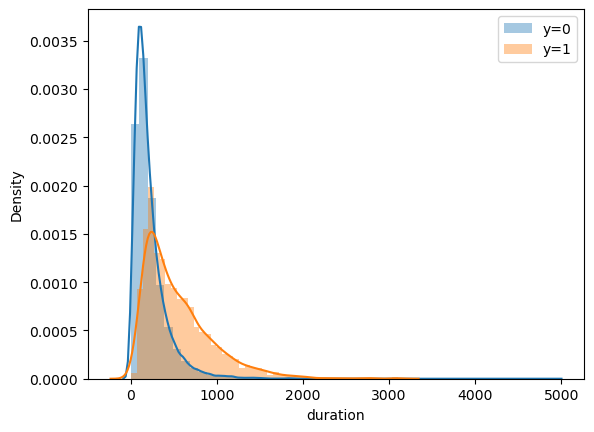

In [9]:
# durationのヒストグラム
sns.distplot(train[train['y']==0]['duration'],label='y=0')
sns.distplot(train[train['y']==1]['duration'],label='y=1')
plt.legend()
plt.show()

In [11]:
train_y1 = train[train["y"] == 1]
#display(train_y1.head())
train_y0 = train[train["y"] == 0]
#display(train_y0.head())
display(train_y0["duration"].mean())
display(train_y1["duration"].mean())
display(train_y0["duration"].max())
display(train_y1["duration"].max())


222.70986056608498

547.5059861373661

4918

3102

In [12]:
# trainをダミー変数化

train_dummy = pd.get_dummies(train)
print(train_dummy.shape)

print(pd.get_dummies(test).shape)

(27128, 52)
(18083, 51)


In [13]:
display(train_dummy.head())

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
id,,,,,,,,,,,,,,,,,,,,,
1,39,1756,3,939,1,-1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,51,1443,18,172,10,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,36,436,13,567,1,595,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,63,474,25,423,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,31,354,30,502,1,9,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
